In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import json

In [3]:
from pkdb_analysis import PKDB, PKData
from pkdb_analysis.plotting import arc_plot, study_overview, study_overview_wrapped

In [4]:
pkdata = PKDB.query()

INFO *** Querying data ***
INFO http://0.0.0.0:8000/api/v1/studies/?format=json&page_size=2000
INFO http://0.0.0.0:8000/api/v1/studies/?format=json&page_size=2000&page=1
INFO http://0.0.0.0:8000/api/v1/interventions_analysis/?format=json&page_size=2000&normed=true
INFO http://0.0.0.0:8000/api/v1/interventions_analysis/?format=json&page_size=2000&normed=true&page=1
/home/florianbartsch/Dev/pkdb_models/pkdb_analysis/pkdb_analysis/query.py:235: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  df[column] = df[column].replace({pd.np.nan: -1}).astype(int)
INFO http://0.0.0.0:8000/api/v1/individuals_analysis/?format=json&page_size=2000
INFO http://0.0.0.0:8000/api/v1/individuals_analysis/?format=json&page_size=2000&page=1
INFO http://0.0.0.0:8000/api/v1/groups_analysis/?format=json&page_size=2000
INFO http://0.0.0.0:8000/api/v1/groups_analysis/?format=json&page_size=2000&page=1
INFO http://0.0.0.0:8000/api/v

In [5]:
def is_substance(substance_list, target):
    for substance in substance_list:
        if isinstance(target, str):
            if substance["name"] == target:
                return True
        elif isinstance(target, list):
            if substance["name"].isin(target):
                return True
    return False

study_index = pkdata.studies["substances"].apply(is_substance, args=("caffeine",))

subset = pkdata.copy()
subset.studies = subset.studies[study_index]
subset._concise()

WARNING Concise DataFrames


In [6]:
print(subset)

------------------------------
PKData (139916116778832)
------------------------------
studies             0  (    0)
groups              0  (    0)
individuals         0  (    0)
interventions       0  (    0)
outputs             0  (    0)
timecourses         0  (    0)
------------------------------


In [281]:
json_dict  = arc_plot(subset)

/home/janekg/Env/pkdb_analysis/lib/python3.7/site-packages/pandas/core/frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [282]:
with open('test1.json', 'w') as json_file:
    json.dump(json_dict, json_file)

WARNING Concise DataFrames
WARNING Concise DataFrames
WARNING Concise DataFrames
WARNING Concise DataFrames
WARNING Concise DataFrames
WARNING Concise DataFrames


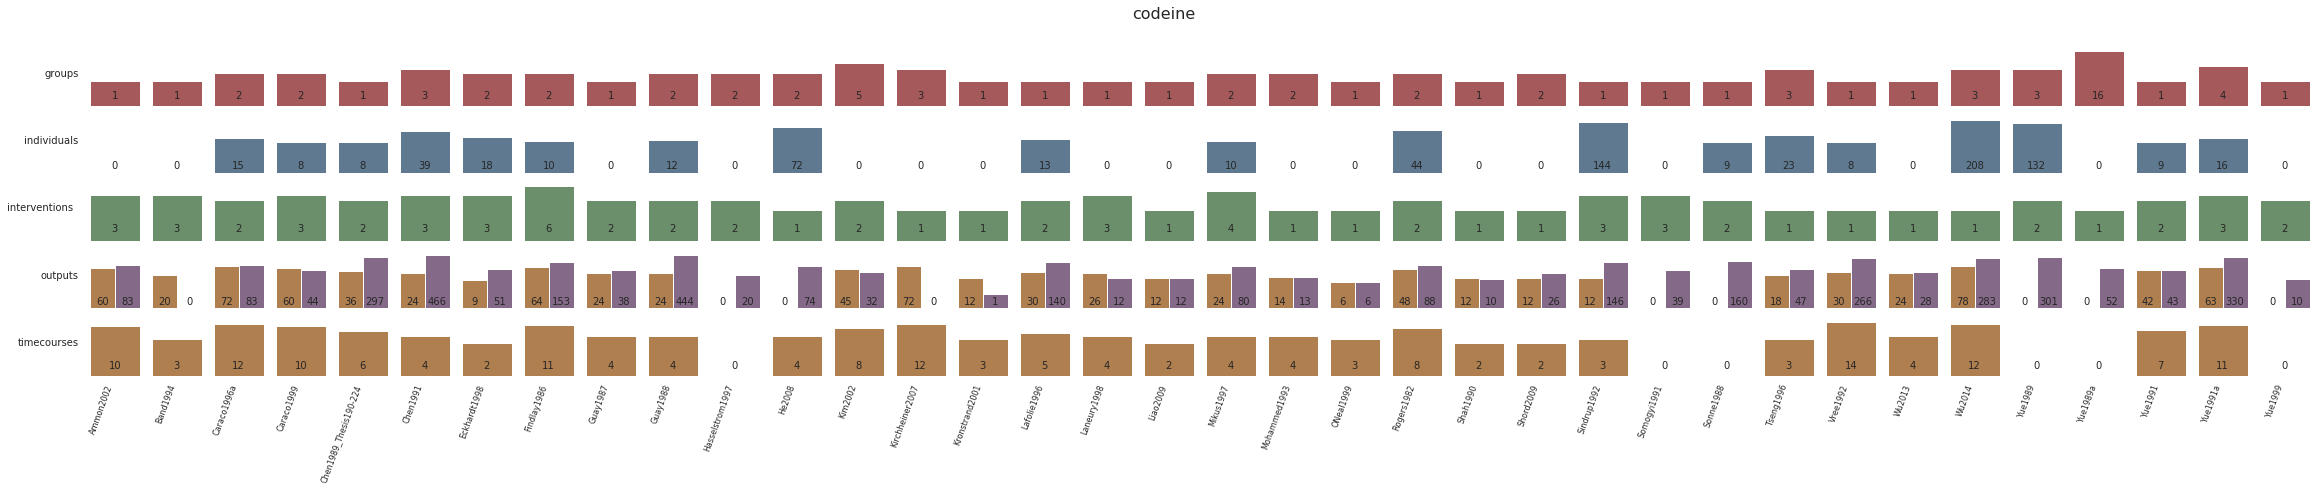

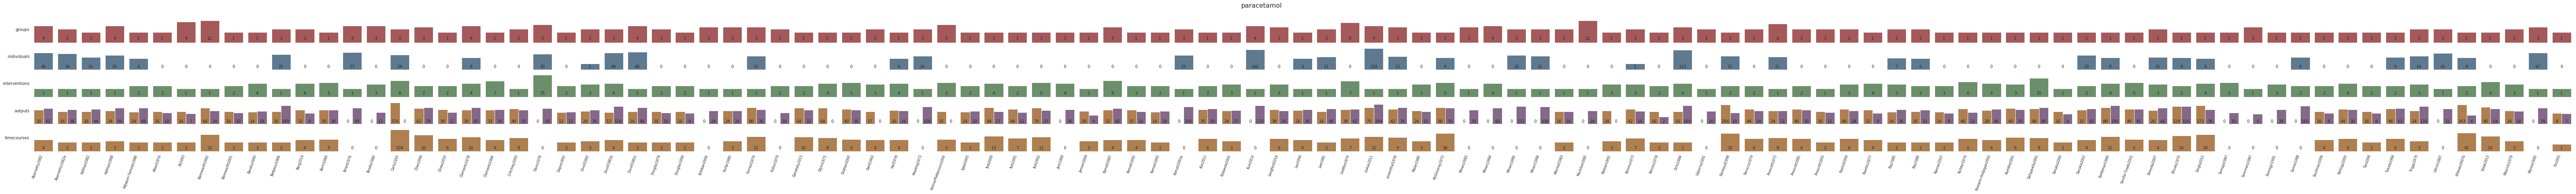

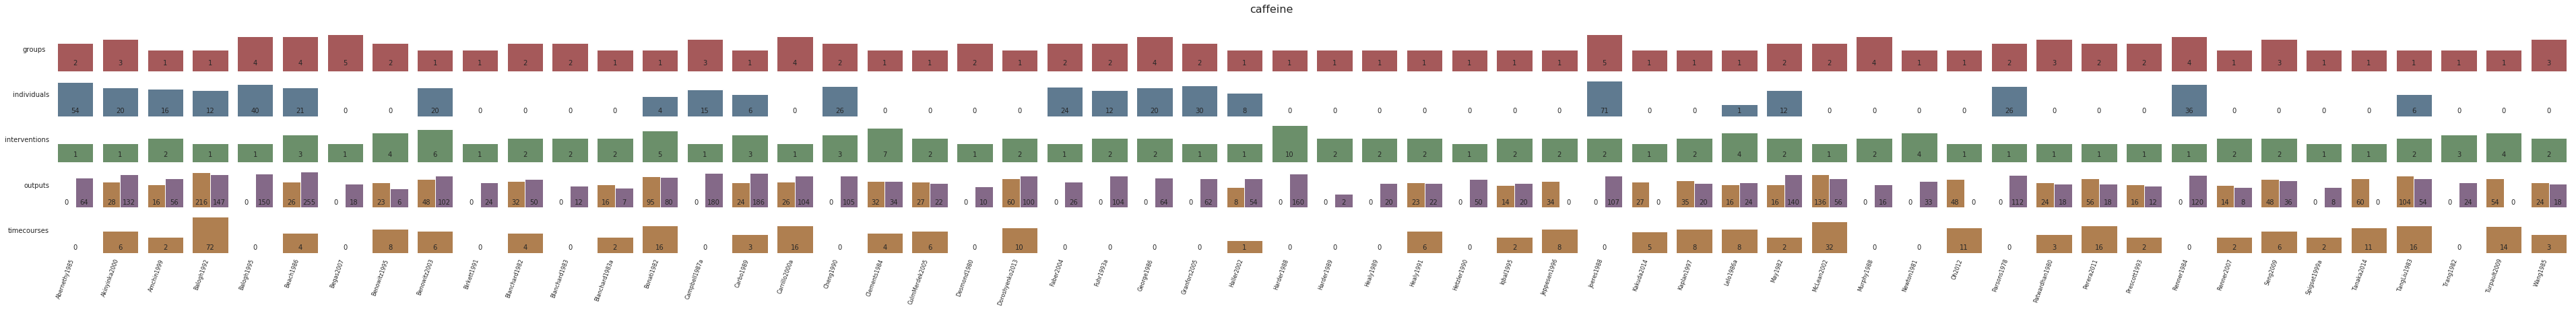

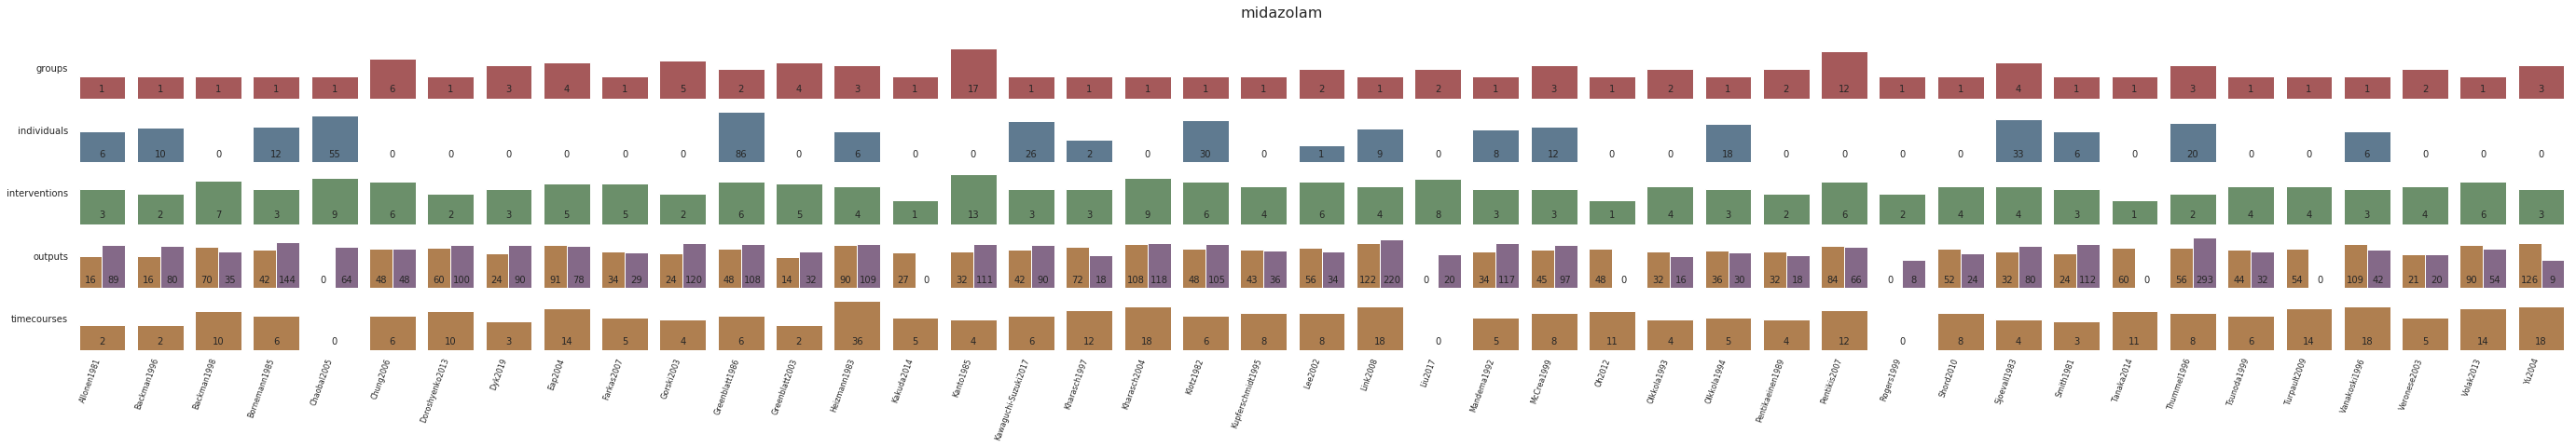

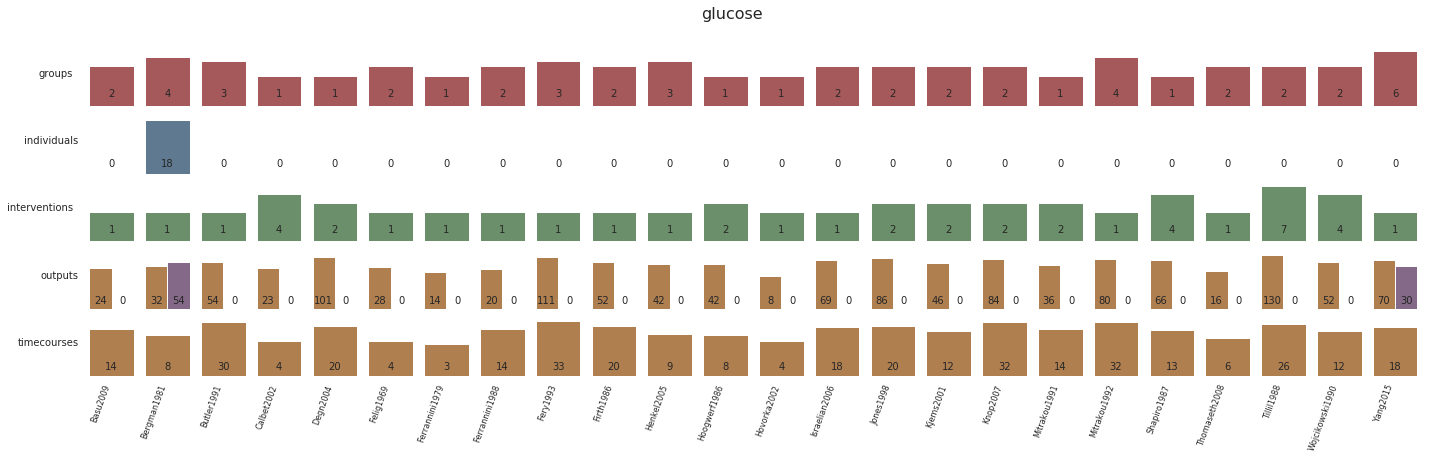

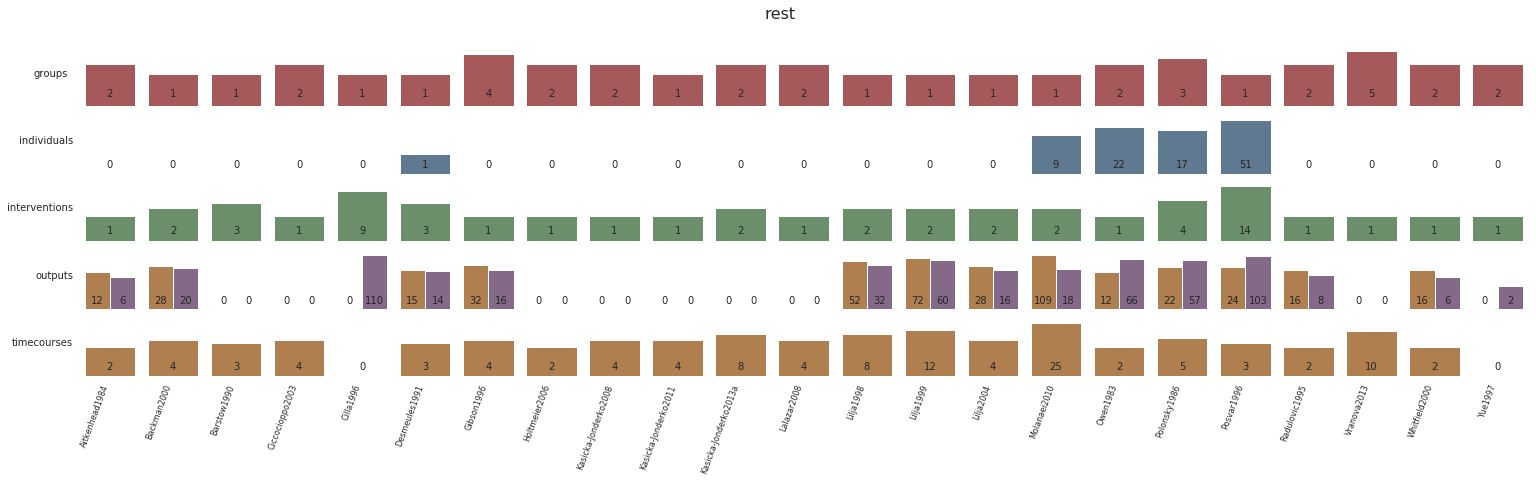

In [276]:
used_studies = set()
for substance in ["codeine", "paracetamol","caffeine","midazolam", "glucose"]:
    subset = pkdata.copy()
    study_index = pkdata.studies["substances"].apply(is_substance, args=(substance,))
    subset = pkdata.copy()
    subset.studies = subset.studies[study_index]
    subset._concise()
    used_studies = used_studies.union(subset.studies.pks)
    p_i, df = study_overview(subset, figsize=(len(subset.studies),6),title=substance)
    
studies_rest = pkdata.studies.pks - used_studies
subset = pkdata.filter_study(lambda x: x["sid"].isin(studies_rest))
p_i, df = study_overview(subset, figsize=(len(subset.studies),6),title="rest")


WARNING Concise DataFrames
WARNING Concise DataFrames
WARNING Concise DataFrames
WARNING Concise DataFrames


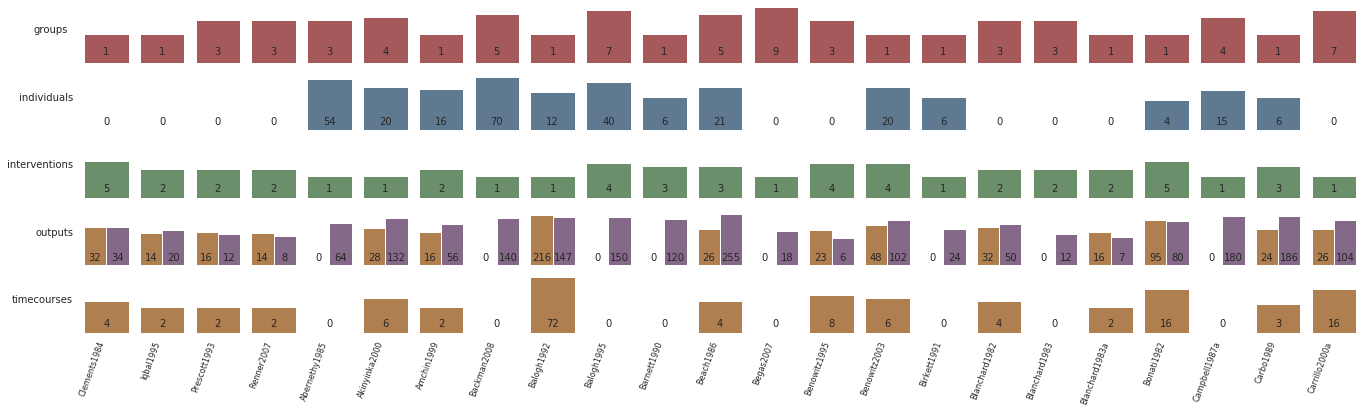

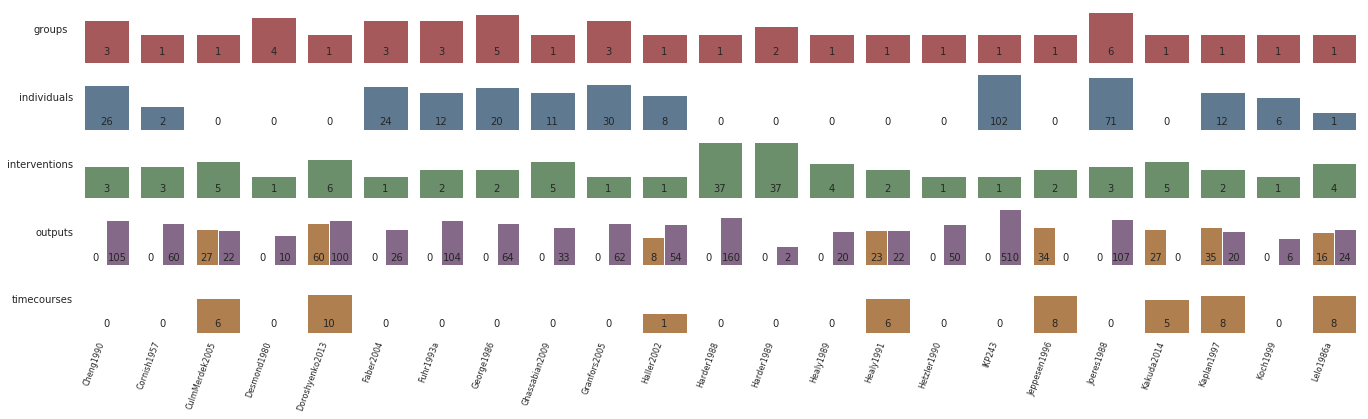

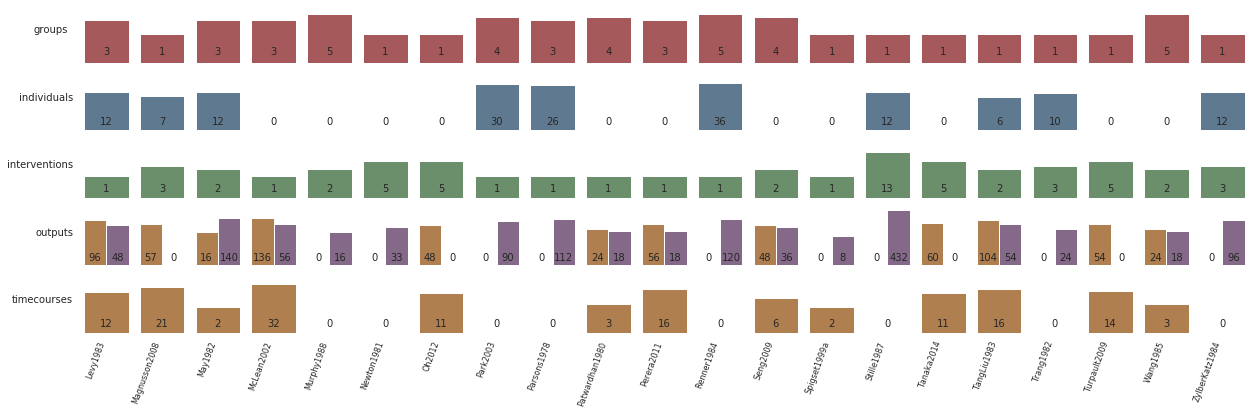

In [345]:

study_index = pkdata.studies["substances"].apply(is_substance, args=("caffeine",))
caffeine_data = pkdata.copy()
caffeine_data.studies = caffeine_data.studies[study_index]
caffeine_data._concise()

study_overview_wrapped(caffeine_data, rows=3)

In [351]:
pkdata.outputs.sort_values(["mean"])

,output_pk,intervention_pk,study_sid,study_name,group_pk,individual_pk,normed,calculated,tissue,time,...,substance,value,mean,median,min,max,sd,se,cv,unit
22722,46532,575,PKDB00082,Mitrakou1991,697,-1,True,True,plasma,NaN,...,glucose,NaN,-16986.956801,NaN,NaN,NaN,NaN,NaN,NaN,gram * hour / liter
22725,46535,575,PKDB00082,Mitrakou1991,697,-1,True,True,plasma,NaN,...,glucose,NaN,-120.836470,NaN,NaN,NaN,NaN,NaN,NaN,hour
22336,45757,563,PKDB00075,Firth1986,677,-1,True,True,plasma,NaN,...,glucagon,NaN,-98.676752,NaN,NaN,NaN,NaN,NaN,NaN,hour
22829,46743,577,PKDB00083,Mitrakou1992,702,-1,True,True,plasma,NaN,...,glucagon,NaN,-52.661249,NaN,NaN,NaN,NaN,NaN,NaN,hour
22823,46731,577,PKDB00083,Mitrakou1992,699,-1,True,True,plasma,NaN,...,glucagon,NaN,-51.227860,NaN,NaN,NaN,NaN,NaN,NaN,hour
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28278,57644,796,8877677,Posvar1996,-1,3873,True,False,plasma,NaN,...,atorvastatin,0.000043,NaN,NaN,NaN,NaN,NaN,NaN,NaN,gram / liter
28279,57645,796,8877677,Posvar1996,-1,3874,True,False,plasma,NaN,...,atorvastatin,0.000051,NaN,NaN,NaN,NaN,NaN,NaN,NaN,gram / liter
28280,57646,796,8877677,Posvar1996,-1,3875,True,False,plasma,NaN,...,atorvastatin,0.000062,NaN,NaN,NaN,NaN,NaN,NaN,NaN,gram / liter
28281,57647,797,8877677,Posvar1996,-1,3876,True,False,plasma,NaN,...,atorvastatin,0.000145,NaN,NaN,NaN,NaN,NaN,NaN,NaN,gram / liter
